In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
nycData = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\anand.khare\AppData\Local\Temp\1\ipykernel_16520\3614928092.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  nycData = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


In [3]:
nycData.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


#### nycData.head()

In [4]:
# Convert Date String to Date Time
nycData['Created Date'] = pd.to_datetime(nycData['Created Date'])
nycData['Closed Date'] = pd.to_datetime(nycData['Closed Date'])

In [5]:
# create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing
nycData['Request_Closing_Time'] = nycData['Closed Date'].values - nycData['Created Date'].values
nycData.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:30
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:13
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:34
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:27
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:44


In [6]:
nycData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      364558 non-null  int64          
 1   Created Date                    364558 non-null  datetime64[ns] 
 2   Closed Date                     362177 non-null  datetime64[ns] 
 3   Agency                          364558 non-null  object         
 4   Agency Name                     364558 non-null  object         
 5   Complaint Type                  364558 non-null  object         
 6   Descriptor                      358057 non-null  object         
 7   Location Type                   364425 non-null  object         
 8   Incident Zip                    361560 non-null  float64        
 9   Incident Address                312859 non-null  object         
 10  Street Name                     312859 non-n

#### Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining

##### 1. First Insight/Conclusion

In [7]:
uniqueComplaints = nycData['Complaint Type'].unique()
uniqueComplaints

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [8]:
dfComplaint = nycData.groupby(['City', 'Complaint Type']).size().unstack().fillna(0)
dfComplaint.head(100)


Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Parking,Noise - Commercial,Noise - House of Worship,...,Noise - Vehicle,Panhandling,Traffic,Urinating in Public,Vending,Bike/Roller/Skate Chronic,Illegal Fireworks,Posting Advertisement,Squeegee,Animal in a Park
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,46.0,50.0,32.0,2.0,1.0,1.0,4.0,62.0,2.0,14.0,...,10.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
ASTORIA,170.0,3436.0,426.0,5.0,43.0,4.0,32.0,1340.0,1653.0,21.0,...,236.0,2.0,60.0,10.0,57.0,16.0,4.0,3.0,0.0,0.0
Astoria,0.0,159.0,14.0,0.0,0.0,0.0,0.0,277.0,311.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BAYSIDE,53.0,514.0,231.0,2.0,1.0,3.0,2.0,638.0,47.0,3.0,...,24.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
BELLEROSE,15.0,138.0,120.0,2.0,1.0,0.0,1.0,132.0,38.0,1.0,...,11.0,1.0,9.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
BREEZY POINT,2.0,3.0,3.0,0.0,1.0,0.0,0.0,16.0,4.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BRONX,1971.0,17063.0,2403.0,66.0,206.0,15.0,275.0,9889.0,2945.0,90.0,...,3556.0,20.0,427.0,54.0,433.0,22.0,24.0,18.0,0.0,0.0
BROOKLYN,3191.0,36447.0,6259.0,79.0,291.0,60.0,948.0,33533.0,13860.0,389.0,...,5966.0,49.0,1258.0,155.0,575.0,124.0,61.0,58.0,0.0,0.0
CAMBRIA HEIGHTS,15.0,177.0,148.0,0.0,0.0,0.0,6.0,113.0,19.0,2.0,...,100.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
dfComplaint.describe()

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Parking,Noise - Commercial,Noise - House of Worship,...,Noise - Vehicle,Panhandling,Traffic,Urinating in Public,Vending,Bike/Roller/Skate Chronic,Illegal Fireworks,Posting Advertisement,Squeegee,Animal in a Park
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,198.660377,1897.132075,404.905660,5.943396,26.433962,2.962264,92.037736,1724.754717,824.283019,20.150943,...,364.037736,6.113208,98.018868,12.094340,78.962264,8.924528,3.245283,12.830189,0.075472,0.018868
std,566.130521,5424.664807,937.500528,17.622554,67.691753,8.965666,436.602881,5084.446006,3159.896240,67.283955,...,1251.518877,28.941360,306.234669,41.908446,371.419054,38.394636,10.205401,71.358180,0.549442,0.137361
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,159.000000,41.000000,0.000000,1.000000,0.000000,1.000000,167.000000,21.000000,0.000000,...,10.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,514.000000,172.000000,1.000000,4.000000,0.000000,6.000000,449.000000,72.000000,1.000000,...,53.000000,0.000000,14.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,1681.000000,366.000000,2.000000,13.000000,3.000000,18.000000,988.000000,249.000000,4.000000,...,97.000000,1.000000,32.000000,5.000000,19.000000,2.000000,1.000000,1.000000,0.000000,0.000000
max,3191.000000,36447.000000,6259.000000,81.000000,321.000000,60.000000,3060.000000,33533.000000,18692.000000,389.000000,...,6295.000000,206.000000,1770.000000,264.000000,2639.000000,254.000000,61.000000,517.000000,4.000000,1.000000


In [10]:
dfComplaint.describe

<bound method NDFrame.describe of Complaint Type       Animal Abuse  Blocked Driveway  Derelict Vehicle  \
City                                                                    
ARVERNE                      46.0              50.0              32.0   
ASTORIA                     170.0            3436.0             426.0   
Astoria                       0.0             159.0              14.0   
BAYSIDE                      53.0             514.0             231.0   
BELLEROSE                    15.0             138.0             120.0   
BREEZY POINT                  2.0               3.0               3.0   
BRONX                      1971.0           17063.0            2403.0   
BROOKLYN                   3191.0           36447.0            6259.0   
CAMBRIA HEIGHTS              15.0             177.0             148.0   
CENTRAL PARK                  0.0               0.0               0.0   
COLLEGE POINT                35.0             597.0             223.0   
CORONA           

In [11]:
print(dfComplaint.columns)

Index(['Animal Abuse', 'Blocked Driveway', 'Derelict Vehicle',
       'Disorderly Youth', 'Drinking', 'Graffiti', 'Homeless Encampment',
       'Illegal Parking', 'Noise - Commercial', 'Noise - House of Worship',
       'Noise - Park', 'Noise - Street/Sidewalk', 'Noise - Vehicle',
       'Panhandling', 'Traffic', 'Urinating in Public', 'Vending',
       'Bike/Roller/Skate Chronic', 'Illegal Fireworks',
       'Posting Advertisement', 'Squeegee', 'Animal in a Park'],
      dtype='object', name='Complaint Type')


<AxesSubplot: xlabel='City'>

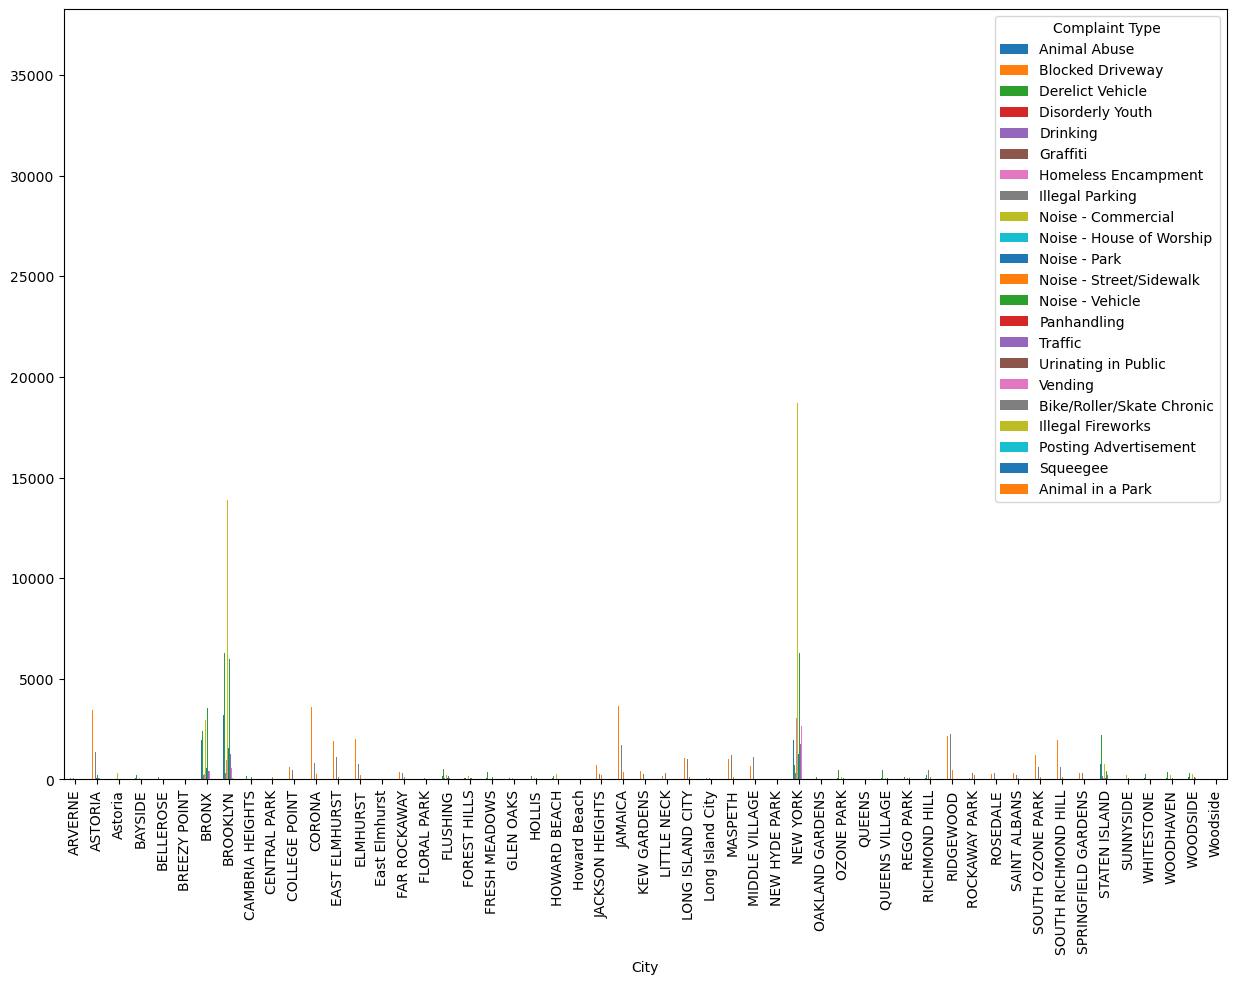

In [12]:
dfComplaint.plot(figsize=(15,10), kind='bar', stacked=False, legend=True)

From the above bar plot we can see that Brooklyn and Newyork has most number of complaints including most of the complaint types. 
Further for both Brooklyn and Neyork can be found along with total sum.

Total complaints in Brooklyn = 103303
Total Complaints in NewYork  = 53816

#####  Second Conclusion

In [13]:
# Get uniqie Status
nycData.Status.unique()

array(['Closed', 'Open', 'Assigned', 'Draft'], dtype=object)

In [14]:
dfStatus = nycData.groupby(['City', 'Status']).size().unstack().fillna(0)
dfStatus.head(100)

Status,Assigned,Closed,Draft,Open
City,,,,
ARVERNE,0.0,259.0,0.0,0.0
ASTORIA,0.0,7991.0,0.0,0.0
Astoria,0.0,905.0,0.0,1.0
BAYSIDE,2.0,1548.0,0.0,0.0
BELLEROSE,0.0,487.0,0.0,0.0
BREEZY POINT,0.0,31.0,0.0,0.0
BRONX,6.0,49159.0,1.0,5.0
BROOKLYN,20.0,118829.0,1.0,12.0
CAMBRIA HEIGHTS,0.0,617.0,0.0,0.0


In [15]:
dfStatus.sort_values(by = 'Open', ascending=False).head()

Status,Assigned,Closed,Draft,Open
City,,,,
NEW YORK,16.0,77278.0,0.0,18.0
BROOKLYN,20.0,118829.0,1.0,12.0
JAMAICA,1.0,8922.0,0.0,9.0
STATEN ISLAND,2.0,15332.0,0.0,6.0
BRONX,6.0,49159.0,1.0,5.0


Looking at the above results we can conclude that majority of complaints are resolved. 
Agian New York and Brroklyn are at the top of unresolved complaints. 

##### Third Conclusion

Since maximum complaints were logged in Brooklyn analyse the compaint distribution for the city

[Text(0, 0, 'Illegal Parking'),
 Text(1, 0, 'Blocked Driveway'),
 Text(2, 0, 'Noise - Commercial'),
 Text(3, 0, 'Noise - Street/Sidewalk'),
 Text(4, 0, 'Noise - Vehicle'),
 Text(5, 0, 'Traffic'),
 Text(6, 0, 'Derelict Vehicle'),
 Text(7, 0, 'Animal Abuse'),
 Text(8, 0, 'Drinking'),
 Text(9, 0, 'Vending'),
 Text(10, 0, 'Noise - Park'),
 Text(11, 0, 'Homeless Encampment'),
 Text(12, 0, 'Posting Advertisement'),
 Text(13, 0, 'Panhandling'),
 Text(14, 0, 'Graffiti'),
 Text(15, 0, 'Noise - House of Worship'),
 Text(16, 0, 'Bike/Roller/Skate Chronic'),
 Text(17, 0, 'Urinating in Public'),
 Text(18, 0, 'Disorderly Youth'),
 Text(19, 0, 'Illegal Fireworks')]

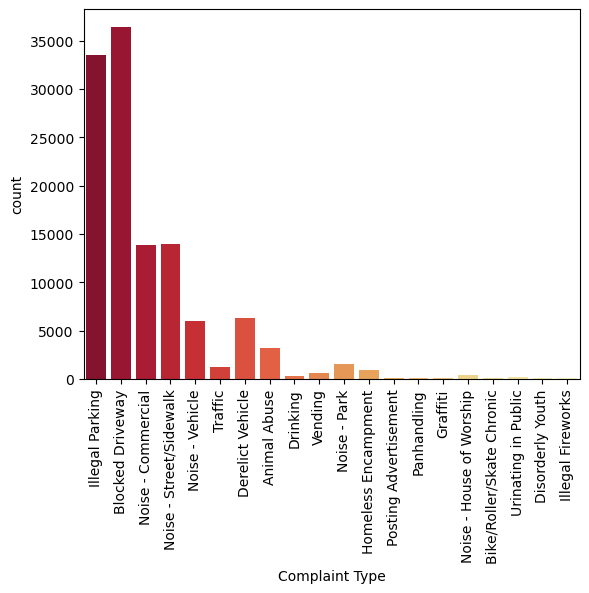

In [16]:
nycData.loc[(nycData['City']=='BROOKLYN'),:]['Complaint Type'].value_counts()
plotBrooklyn= sns.countplot(x=nycData.loc[nycData.City=='BROOKLYN']['Complaint Type'], palette='YlOrRd_r')
plotBrooklyn.set_xticklabels(plotBrooklyn.get_xticklabels(), rotation=90)

Blocked Driveway was found to be the most frequent complaint lodged to NYPD in the city of Brooklyn followed by illegal parking complaints.

##### Fourth Conclusion

Investigate the complaint distribution across all cities

In [17]:
nycData['Location Type'].fillna(value='Street/Sidewalk',inplace=True)

In [18]:
nycData['Location Type'].unique

<bound method Series.unique of 0         Street/Sidewalk
1         Street/Sidewalk
2         Street/Sidewalk
3         Street/Sidewalk
4         Street/Sidewalk
               ...       
364553    Street/Sidewalk
364554    Street/Sidewalk
364555    Street/Sidewalk
364556    Street/Sidewalk
364557    Street/Sidewalk
Name: Location Type, Length: 364558, dtype: object>

In [19]:
plt.figure(figsize=(10,5))
plotLocation = sns.countplot(nycData['Location Type'])
plotLocation.set_xticklabels(plotLocation.get_xticklabels(), rotation=90)

ValueError: could not convert string to float: 'Street/Sidewalk'

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Major complaints type and their count
dfComplaintCounts= nycData['Complaint Type'].value_counts().head(10)
dfComplaintCounts.nlargest().index

In [ ]:
dfComplaintCounts

The maximum complaints were regarding Street and Sidwalk which indicate that,
there is a scope for improvement in strict measures on the road. 
Thus Traffic police  and local authorities have to look into this matter

### Statistical Test

##### Whether the average response time across complaint types is similar or not (overall)#### Whether the average response time across complaint types is similar or not (overall)

Null Hypothesis: average response time across complaint types is similar

Alternate Hypothesis: average response time across complaint types is  not similar

In [21]:
import scipy.stats as stats
import math

In [33]:
uniqueComplaints

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

TypeError: The DType <class 'numpy.dtype[timedelta64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[timedelta64]'>, <class 'numpy.dtype[float64]'>)

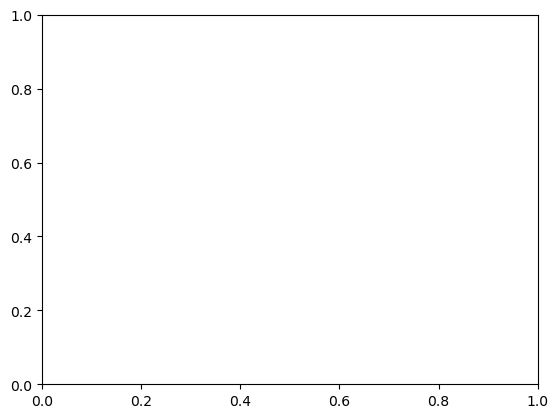

In [53]:
# Since blocked driver way is the most recorded complaint
# lets analyse it if needed apply some tranformation
indx = nycData['Complaint Type'] == 'Blocked Driveway'
dfDriveway = nycData['Request_Closing_Time'][indx]
dfDriveway.hist(range=(0,1500)) 

TypeError: The DType <class 'numpy.dtype[timedelta64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[timedelta64]'>, <class 'numpy.dtype[float64]'>)

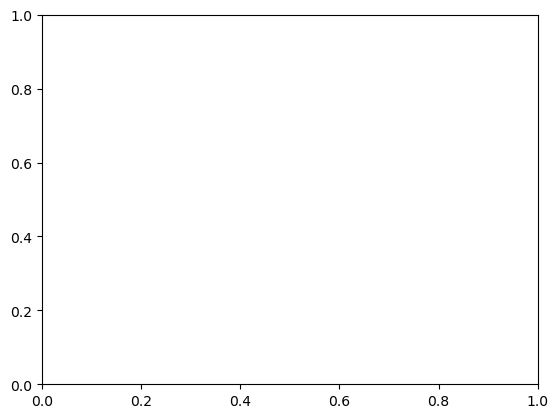

In [54]:
# Perform same analysis on complaint type sidewalk/street
indx = nycData['Complaint Type'] == 'Noise - Street/Sidewalk'
dfNoise = nycData['Request_Closing_Time'][indx]
dfNoise.hist(range=(0,1500)) 

The above histograms show that the closing time dat ais right skewed.

hence need to perform lgo transformation

In [61]:
dataset = {}
for i in nycData['Complaint Type'].unique():
    dataset[i] = np.log(nycData[nycData['Complaint Type'] == i]['Request_Closing_Time'])

TypeError: ufunc 'log' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [59]:
# Check the histograms again
dataset['Blocked Driveway'].hist()

KeyError: 'Blocked Driveway'

In [60]:
dataset['Noise - Street/Sidewalk'].hist()

KeyError: 'Noise - Street/Sidewalk'

In [ ]:
Here we will use ANOVA as statistical test as

We are trying to compare ore than one categorial data (Complaint types) with one continuos data(closing time)

In [63]:
# Top 5 complaints 
F, p = stats.f_oneway(dataset['Blocked Driveway'], dataset['Illegal parking'], dataset['Noise – Street/Sidewalk'], dataset['Noise – Commercial'], dataset['Derelict Vehicle'])

KeyError: 'Blocked Driveway'

In [71]:
alpha = 0.05
print("p-value for significance level of 0.05 is: ", p)
if p<0.05:
    print("Reject null hypothesis. Hence average response time across complaint types is not similar ")
else:
    print("Accept null hypothesis. Hence average response time across complaint types is similar")

NameError: name 'p' is not defined

##### Are the type of complaint or service requested and location related?

Now we have two categorical vairbales Complaint types and location

hence we will use chi-square test

Null Hypothesis : Complaint Types and Location are related

Alternate Hypothesis : Complaint Types and Locationa are not related

In [65]:
contingency_table=pd.crosstab(nycData['Complaint Type'], nycData['Location Type'])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 Location Type              Bridge  Club/Bar/Restaurant  Commercial  Ferry  \
Complaint Type                                                              
Agency Issues                   0                    0           0      0   
Animal Abuse                    0                    0         108      0   
Animal in a Park                0                    0           0      0   
Bike/Roller/Skate Chronic       0                    0           0      0   
Blocked Driveway                0                    0           0      0   
Derelict Vehicle                0                    0           0      0   
Disorderly Youth                0                    0           0      0   
Drinking                        0                  458           0      0   
Ferry Complaint                 0                    0           0      1   
Graffiti                        0                    0           0      0   
Homeless Encampment             2                    0

In [66]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Observed Values :-
 [[     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      8      0      0      0]
 [     0      0    108      0      0    245      0      0    144    160
     533   6727      0    717   1881     26      0      0]
 [     0      0      0      0      0      0      0      1      0      0
       0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0     32      0     60    386      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0 100881      0      0      0]
 [     0      0      0      0     19      0      0      0      0      0
       0      0      8      0  21539      0      0     95]
 [     0      0      0      0      0      0      0      0      0      0
       0     93      0     10    212      0      0      0]
 [     0    458      0      0      0      0      0      0     9

In [68]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

chi-square statistic:- 151183.01501225884
critical_value: 3.841458820694124


In [70]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 151183.01501225884
critical_value: 3.841458820694124


In [72]:
if chi_square_statistic>=critical_value:
    print("Reject Null Hypothesis,There is no relationship between Complaint Types and Location")
else:
    print("Accept Null Hypothesis, There is a relationship between Complaint Types and Location")
    
if p_value<=alpha:
    print("Reject Null Hypothesis, There is no relationship between Complaint Types and Location")
else:
    print("Acept Null Hypothesis,There is a relationship between Complaint Types and Location")

Reject Null Hypothesis,There is no relationship between Complaint Types and Location
Reject Null Hypothesis, There is no relationship between Complaint Types and Location
